# Gene regulatory network
In the following document we provide an example of genetic regulatory cascade with multiple stages. Both, deterministic and stochastic models are considered. For stochastic simulations the Gillespie algorithm implemented in StochPy library is used.

## Deterministic model of genetic cascade with 7 stages

In [1]:
# First, ensure you have matplotlib and numpy installed
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install stochpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
/kyukon/home/gent/466/vsc46678/StochPy-2.3
Defaulting to user installation because normal site-packages is not writeable
Processing /kyukon/home/gent/466/vsc46678/StochPy-2.3
  Preparing metadata (setup.py) ... done
  Created wheel for StochPy: filename=StochPy-2.3-py3-none-any.whl size=304108 sha256=432d76bbb762ba71ced2d5315469d405fce0eaec182c90baabc9dfd9b9409ea2
  Stored in directory: /kyukon/home/gent/466/vsc46678/.cache/pip/wheels/61/

In [1]:
# import libraries
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import matplotlib.gridspec as gridspec

# Create a mock MachAr function or object - necessary for compatibility with newer NumPy versions
class MockMachAr:
    def __init__(self):
        # Initialize with default machine characteristics, adjust as necessary
        self.epsilon = np.finfo(float).eps
        self.tiny = np.finfo(float).tiny
        self.huge = np.finfo(float).max
        self.precision = np.finfo(float).precision
        self.resolution = np.finfo(float).resolution

# Inject the mock MachAr into numpy
np.MachAr = MockMachAr

import stochpy

Info: Model Signaling3cCD.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model SignalingTimeVaryingL.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model Schlogl.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model Burstmodel.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model ImmigrationDeath.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model BirthDeath.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model DecayingDimerizing.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model Autoreg.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model Autoreg.xml copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model CellDivision.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model GeneDuplication.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model Isomerization.psc copied to /user/gent/466/vsc46678/Stochpy/pscmodels
Info: Model Polymerase.

In [2]:
# set parameters

# initial state
y0 = [0,0,0,0,0,0,0]

# reaction parameters
k1 = 1
gamma1 = 0.1
Gamma1 = 0.1
K1 = 0.05
b1 = K1/gamma1

gamma = 0.05
Gamma = 0.5
kmax = 2
kd = 2
K = 0.1
n = 2
b = K/gamma

labels = ["P1", "P2", "P3", "P4", "P5", "P6", "P7"]
col = ["b", "g", "r", "c", "m", "#07c9fa", "#ffd000"]


## Stochastic modelling using Gillespie algorithm

In the following section we demonstrate stochastic nature of gene regulatory cascade with $N$ stages. The model results from the following kinetic scheme:
$$
\begin{equation}
     \begin{array}{lll}
        x_1 \xrightarrow{\Omega b_1 k_1} &x_1 + 1 & \\
        x_1 \xrightarrow{\Gamma_1 x_1} &x_1 - 1 & \\
        x_i \xrightarrow{\Omega b_i h_i(x_{i-1}/\Omega)} &x_i + 1 , \qquad &i = 2,3,...,N \\
        x_i \xrightarrow{\Gamma_i x_i} &x_i - 1 , \qquad &i = 2,3,...,N.
     \end{array}
 \end{equation}
 $$

In [3]:
# Set path to the model
path = "//data//gent//466//vsc46678//"

In [4]:
smod_omega00001 = stochpy.SSA()
smod_omega00001.Model(path+"7stage_omega00001.psc")
smod_omega00001.DoStochSim(method="direct",end=1000000000,mode="time",trajectories=5,IsTrackPropensities=False) 

[||||                ] 20%, Runtime: 109.58 sec

/user/gent/466/vsc46678/.local/lib/python3.10/site-packages/stochpy/modules/StochSim.py:1915: RuntimeWarning: invalid value encountered in cast
  self.data_stochsim.setFiredReactions(sim_dat[:,-1].astype(np.uint16))


In [5]:
smod_omega00002 = stochpy.SSA()
smod_omega00002.Model(path+"7stage_omega00002.psc")
smod_omega00002.DoStochSim(method="direct",end=500000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [6]:
smod_omega00005 = stochpy.SSA()
smod_omega00005.Model(path+"7stage_omega00005.psc")
smod_omega00005.DoStochSim(method="direct",end=200000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [7]:
smod_omega0001 = stochpy.SSA()
smod_omega0001.Model(path+"7stage_omega0001.psc")
smod_omega0001.DoStochSim(method="direct",end=100000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [8]:
smod_omega0002 = stochpy.SSA()
smod_omega0002.Model(path+"7stage_omega0002.psc")
smod_omega0002.DoStochSim(method="direct",end=50000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [9]:
smod_omega0005 = stochpy.SSA()
smod_omega0005.Model(path+"7stage_omega0005.psc")
smod_omega0005.DoStochSim(method="direct",end=20000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [10]:
smod_omega001 = stochpy.SSA()
smod_omega001.Model(path+"7stage_omega001.psc")
smod_omega001.DoStochSim(method="direct",end=10000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [11]:
smod_omega0015 = stochpy.SSA()
smod_omega0015.Model(path+"7stage_omega0015.psc")
smod_omega0015.DoStochSim(method="direct",end=7000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [12]:
smod_omega002 = stochpy.SSA()
smod_omega002.Model(path+"7stage_omega002.psc")
smod_omega002.DoStochSim(method="direct",end=5000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [13]:
smod_omega003 = stochpy.SSA()
smod_omega003.Model(path+"7stage_omega003.psc")
smod_omega003.DoStochSim(method="direct",end=3500000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [14]:
smod_omega005 = stochpy.SSA()
smod_omega005.Model(path+"7stage_omega005.psc")
smod_omega005.DoStochSim(method="direct",end=2000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [15]:
smod_omega006 = stochpy.SSA()
smod_omega006.Model(path+"7stage_omega006.psc")
smod_omega006.DoStochSim(method="direct",end=1700000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [16]:
smod_omega01 = stochpy.SSA()
smod_omega01.Model(path+"7stage_omega01.psc")
smod_omega01.DoStochSim(method="direct",end=1000000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [17]:
smod_omega015 = stochpy.SSA()
smod_omega015.Model(path+"7stage_omega015.psc")
smod_omega015.DoStochSim(method="direct",end=700000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [18]:
smod_omega02 = stochpy.SSA()
smod_omega02.Model(path+"7stage_omega02.psc")
smod_omega02.DoStochSim(method="direct",end=500000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [19]:
smod_omega025 = stochpy.SSA()
smod_omega025.Model(path+"7stage_omega025.psc")
smod_omega025.DoStochSim(method="direct",end=400000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [20]:
smod_omega03 = stochpy.SSA()
smod_omega03.Model(path+"7stage_omega03.psc")
smod_omega03.DoStochSim(method="direct",end=350000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [21]:
smod_omega04 = stochpy.SSA()
smod_omega04.Model(path+"7stage_omega04.psc")
smod_omega04.DoStochSim(method="direct",end=250000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [22]:
smod_omega05 = stochpy.SSA()
smod_omega05.Model(path+"7stage_omega05.psc")
smod_omega05.DoStochSim(method="direct",end=200000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [23]:
smod_omega06 = stochpy.SSA()
smod_omega06.Model(path+"7stage_omega06.psc")
smod_omega06.DoStochSim(method="direct",end=170000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [24]:
smod_omega08 = stochpy.SSA()
smod_omega08.Model(path+"7stage_omega08.psc")
smod_omega08.DoStochSim(method="direct",end=125000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [25]:
smod_omega1 = stochpy.SSA()
smod_omega1.Model(path+"7stage_omega1.psc")
smod_omega1.DoStochSim(method="direct",end=100000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [26]:
smod_omega1_5 = stochpy.SSA()
smod_omega1_5.Model(path+"7stage_omega1.5.psc")
smod_omega1_5.DoStochSim(method="direct",end=70000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [27]:
smod_omega2 = stochpy.SSA()
smod_omega2.Model(path+"7stage_omega2.psc")
smod_omega2.DoStochSim(method="direct",end=50000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [28]:
smod_omega2_5 = stochpy.SSA()
smod_omega2_5.Model(path+"7stage_omega2.5.psc")
smod_omega2_5.DoStochSim(method="direct",end=40000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [29]:
smod_omega3 = stochpy.SSA()
smod_omega3.Model(path+"7stage_omega3.psc")
smod_omega3.DoStochSim(method="direct",end=35000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [30]:
smod_omega4 = stochpy.SSA()
smod_omega4.Model(path+"7stage_omega4.psc")
smod_omega4.DoStochSim(method="direct",end=25000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [31]:
smod_omega5 = stochpy.SSA()
smod_omega5.Model(path+"7stage_omega5.psc")
smod_omega5.DoStochSim(method="direct",end=20000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [32]:
smod_omega6 = stochpy.SSA()
smod_omega6.Model(path+"7stage_omega6.psc")
smod_omega6.DoStochSim(method="direct",end=17000,mode="time",trajectories=5,IsTrackPropensities=False) 

In [33]:
smod_omega8 = stochpy.SSA()
smod_omega8.Model(path+"7stage_omega8.psc")
smod_omega8.DoStochSim(method="direct",end=12500,mode="time",trajectories=5,IsTrackPropensities=False) 

In [49]:
smod_omega10 = stochpy.SSA()
smod_omega10.Model(path+"7stage_omega10.psc")
smod_omega10.DoStochSim(method="Tauleap",end=10000,mode="time",trajectories=5,epsilon=0.02,IsTrackPropensities=False) 

In [50]:
smod_omega20 = stochpy.SSA()
smod_omega20.Model(path+"7stage_omega20.psc")
smod_omega20.DoStochSim(method="Tauleap",end=5000,mode="time",trajectories=5,epsilon=0.02,IsTrackPropensities=False) 

In [51]:
smod_omega50 = stochpy.SSA()
smod_omega50.Model(path+"7stage_omega50.psc")
smod_omega50.DoStochSim(method="Tauleap",end=5000,mode="time",trajectories=5,epsilon=0.02,IsTrackPropensities=False) 

In [52]:
smod_omega100 = stochpy.SSA()
smod_omega100.Model(path+"7stage_omega100.psc")
smod_omega100.DoStochSim(method="Tauleap",end=5000,mode="time",trajectories=5,epsilon=0.02,IsTrackPropensities=False) 

In [38]:
smod_omega200 = stochpy.SSA()
smod_omega200.Model(path+"7stage_omega200.psc")
smod_omega200.DoStochSim(method="Tauleap",end=5000,mode="time",trajectories=5,epsilon=0.03,IsTrackPropensities=False) 

In [39]:
smod_omega500 = stochpy.SSA()
smod_omega500.Model(path+"7stage_omega500.psc")
smod_omega500.DoStochSim(method="Tauleap",end=5000,mode="time",trajectories=5,epsilon=0.03,IsTrackPropensities=False) 

In [40]:
smod_omega1k = stochpy.SSA()
smod_omega1k.Model(path+"7stage_omega1k.psc")
smod_omega1k.DoStochSim(method="Tauleap",end=5000,mode="time",trajectories=5,epsilon=0.03,IsTrackPropensities=False) 

In [41]:
smod_omega2k = stochpy.SSA()
smod_omega2k.Model(path+"7stage_omega2k.psc")
smod_omega2k.DoStochSim(method="Tauleap",end=5000,mode="time",trajectories=5,epsilon=0.03,IsTrackPropensities=False) 

In [42]:
smod_omega5k = stochpy.SSA()
smod_omega5k.Model(path+"7stage_omega5k.psc")
smod_omega5k.DoStochSim(method="Tauleap",end=5000,mode="time",trajectories=5,epsilon=0.03,IsTrackPropensities=False) 

In [43]:
smod_omega10k = stochpy.SSA()
smod_omega10k.Model(path+"7stage_omega10k.psc")
smod_omega10k.DoStochSim(method="Tauleap",end=5000,mode="time",trajectories=5,epsilon=0.03,IsTrackPropensities=False) 

## Interpretation of the results

Here we present the results from the simulations above. We observe the change of sample mean (as an approximation of the deterministic stable state) depending on the system volume parameter $\Omega$.

In [44]:
models = [smod_omega00001, smod_omega00002, smod_omega00005, smod_omega0001, smod_omega0002, smod_omega0005, smod_omega001, smod_omega0015, smod_omega002, smod_omega003, smod_omega005, smod_omega006,smod_omega01, smod_omega015 ,smod_omega02, smod_omega025, smod_omega03, smod_omega04, smod_omega05, smod_omega06, smod_omega08, smod_omega1,smod_omega1_5, smod_omega2, smod_omega2_5, smod_omega3, smod_omega4, smod_omega5, smod_omega6, smod_omega8, smod_omega10, smod_omega20, smod_omega50, smod_omega100, smod_omega200, smod_omega500, smod_omega1k, smod_omega2k, smod_omega5k, smod_omega10k]

means = []
fano_factor = []

for i in models:
    model_means = list(i.data_stochsim.species_means.values())
    model_stdevs = list(i.data_stochsim.species_standard_deviations.values())
    ff_list = [(val**2)/model_means[idx] for idx, val in enumerate(model_stdevs)]
    means.append(model_means)
    fano_factor.append(ff_list)
    

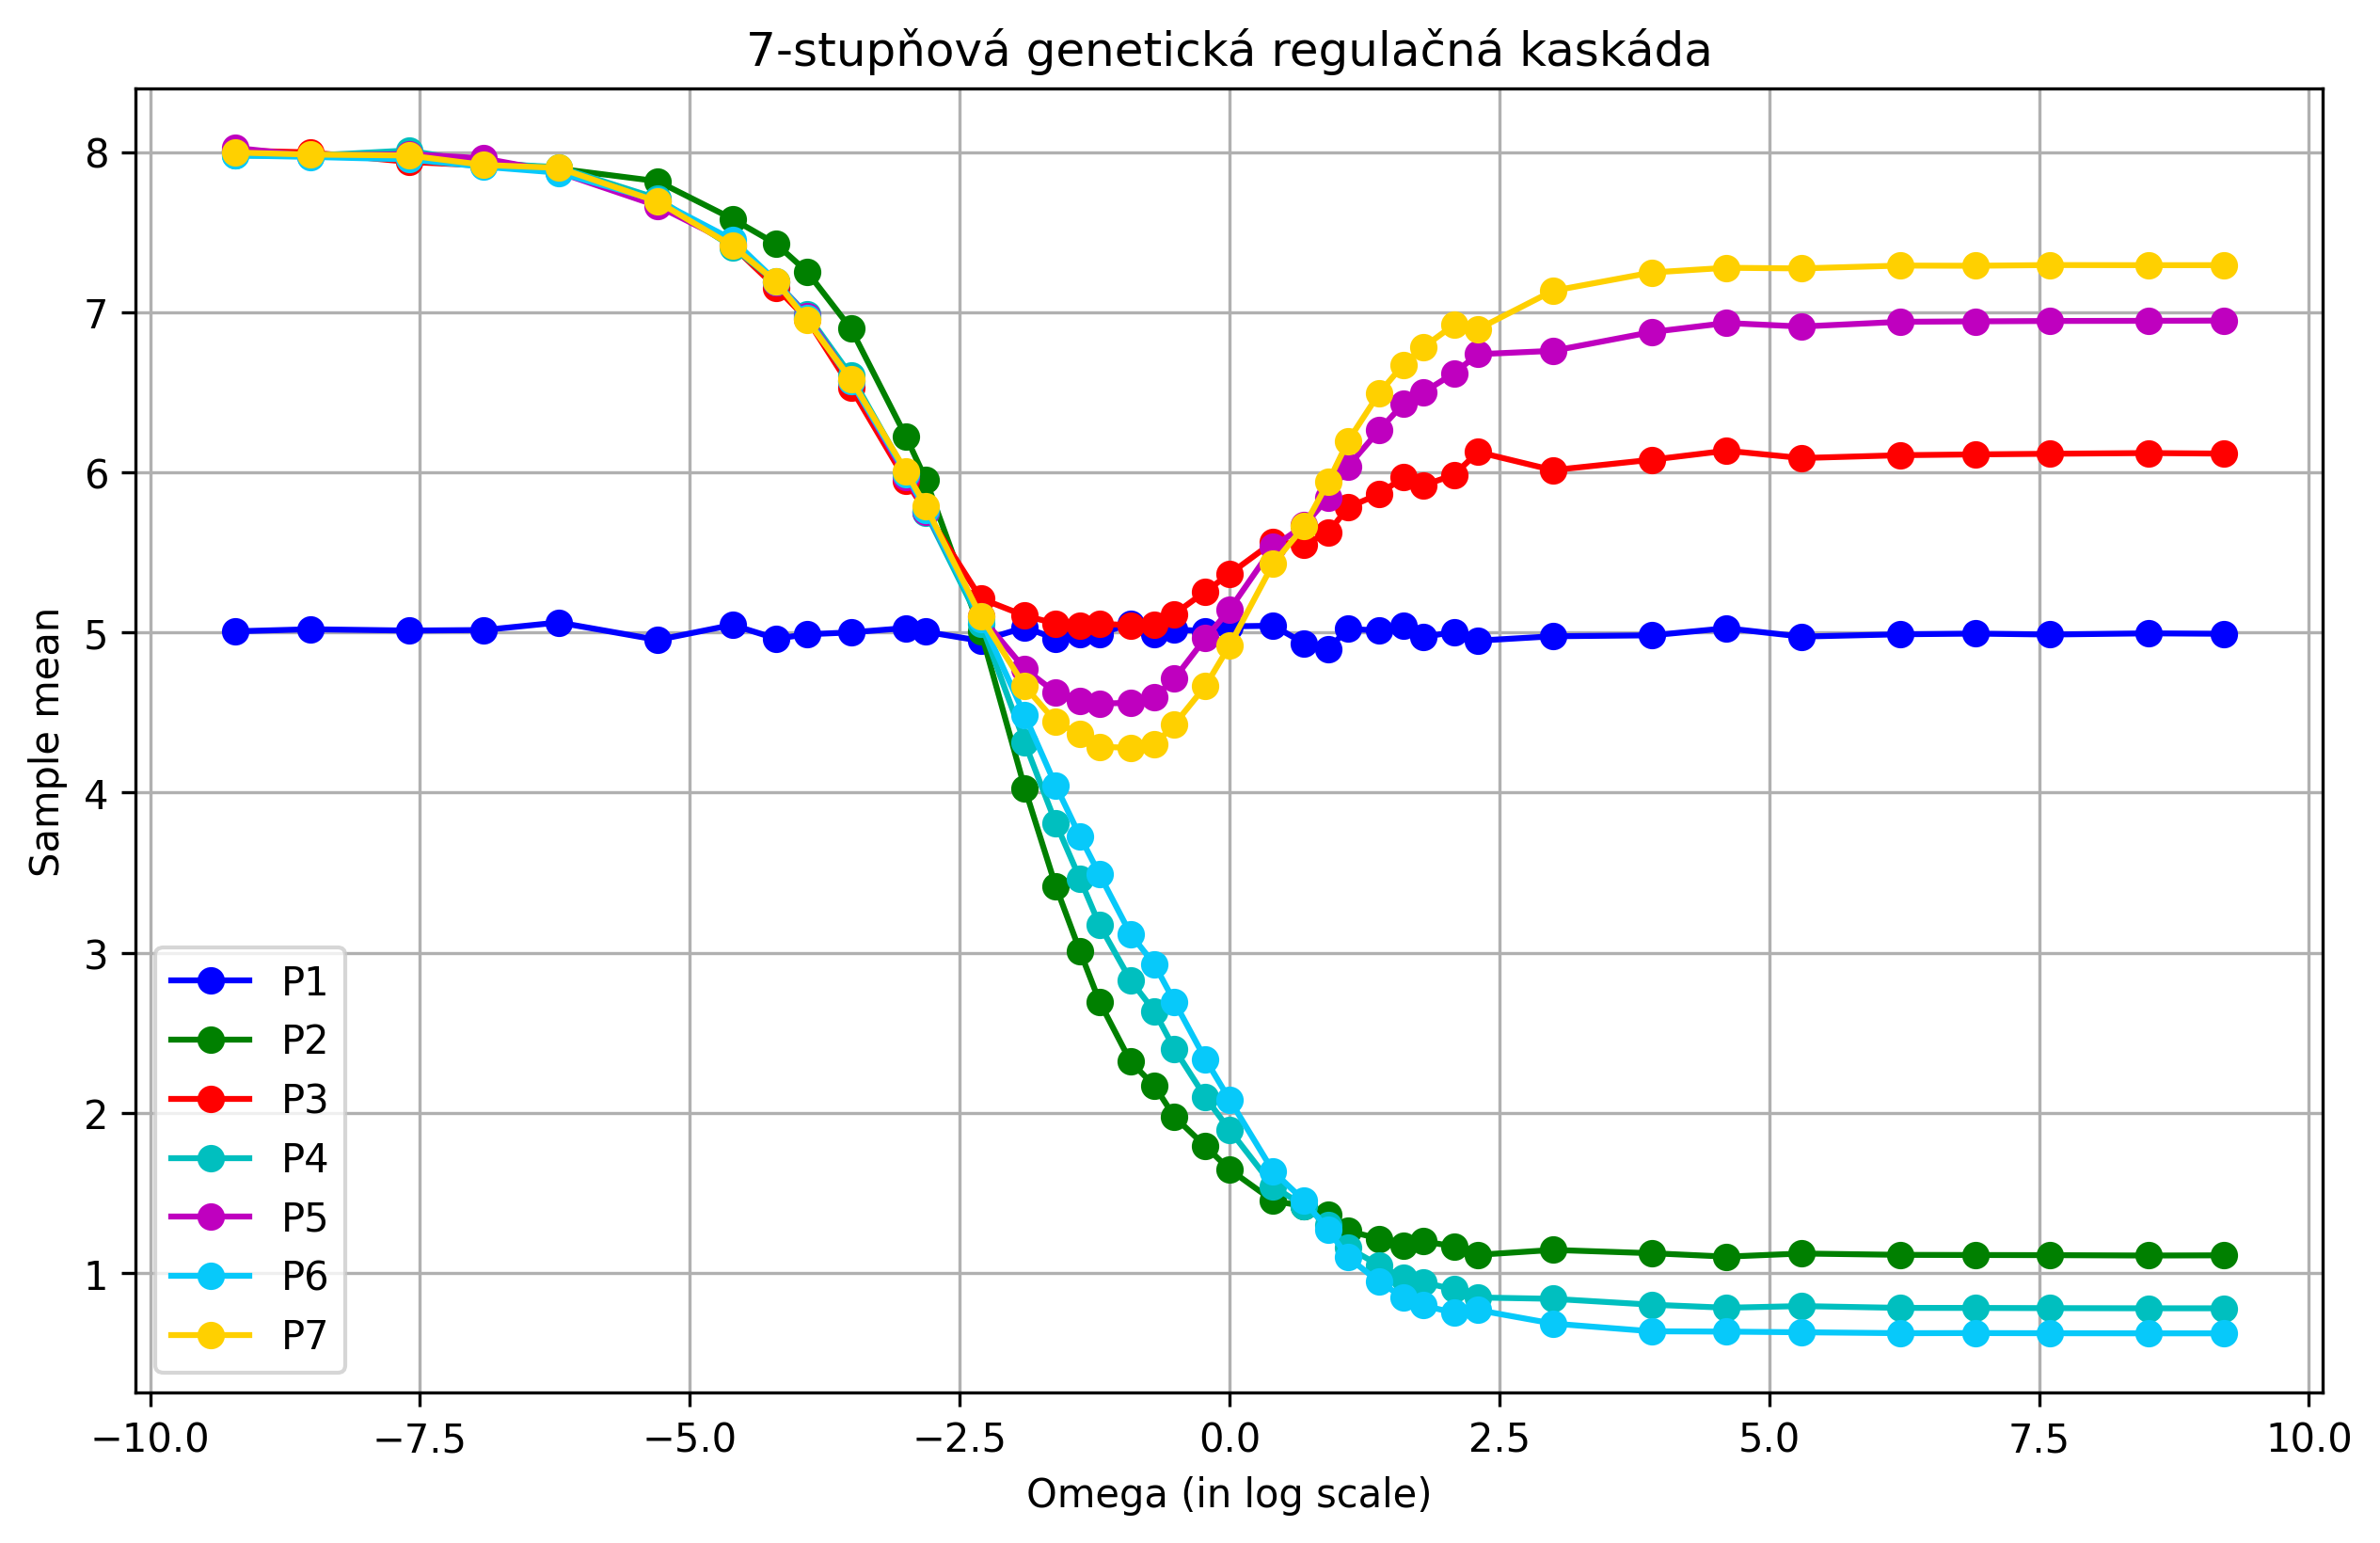

<Figure size 640x480 with 0 Axes>

In [53]:

# Figure parameters
fig0 = plt.figure(figsize=(10, 6), dpi=300)
ax0 = fig0.add_subplot(111)

import math
omega = [0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.015,0.02,0.03,0.05,0.06,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.8,1,1.5,2,2.5,3,4,5,6,8,10,20,50,100,200,500,1000,2000,5000,10000]
omega_log = [math.log(k) for k in omega]
means_scaled = [] 
# Plotting lines
line_p = []
for i in range(7):
    y_mean = [val[i]/omega[idx] for idx, val in enumerate(means)]
    means_scaled.append(y_mean)
    line__p, = ax0.plot(omega_log, y_mean, color=col[i], label=labels[i], marker = 'o')
    line_p.append(line__p)

ax0.set_ylabel('Sample mean')
ax0.set_xlabel('Omega (in log scale)')
ax0.set_title("7-stage gene regulatory cascade")
ax0.legend(handles=line_p, loc="lower left")
ax0.grid(True)

plt.show()

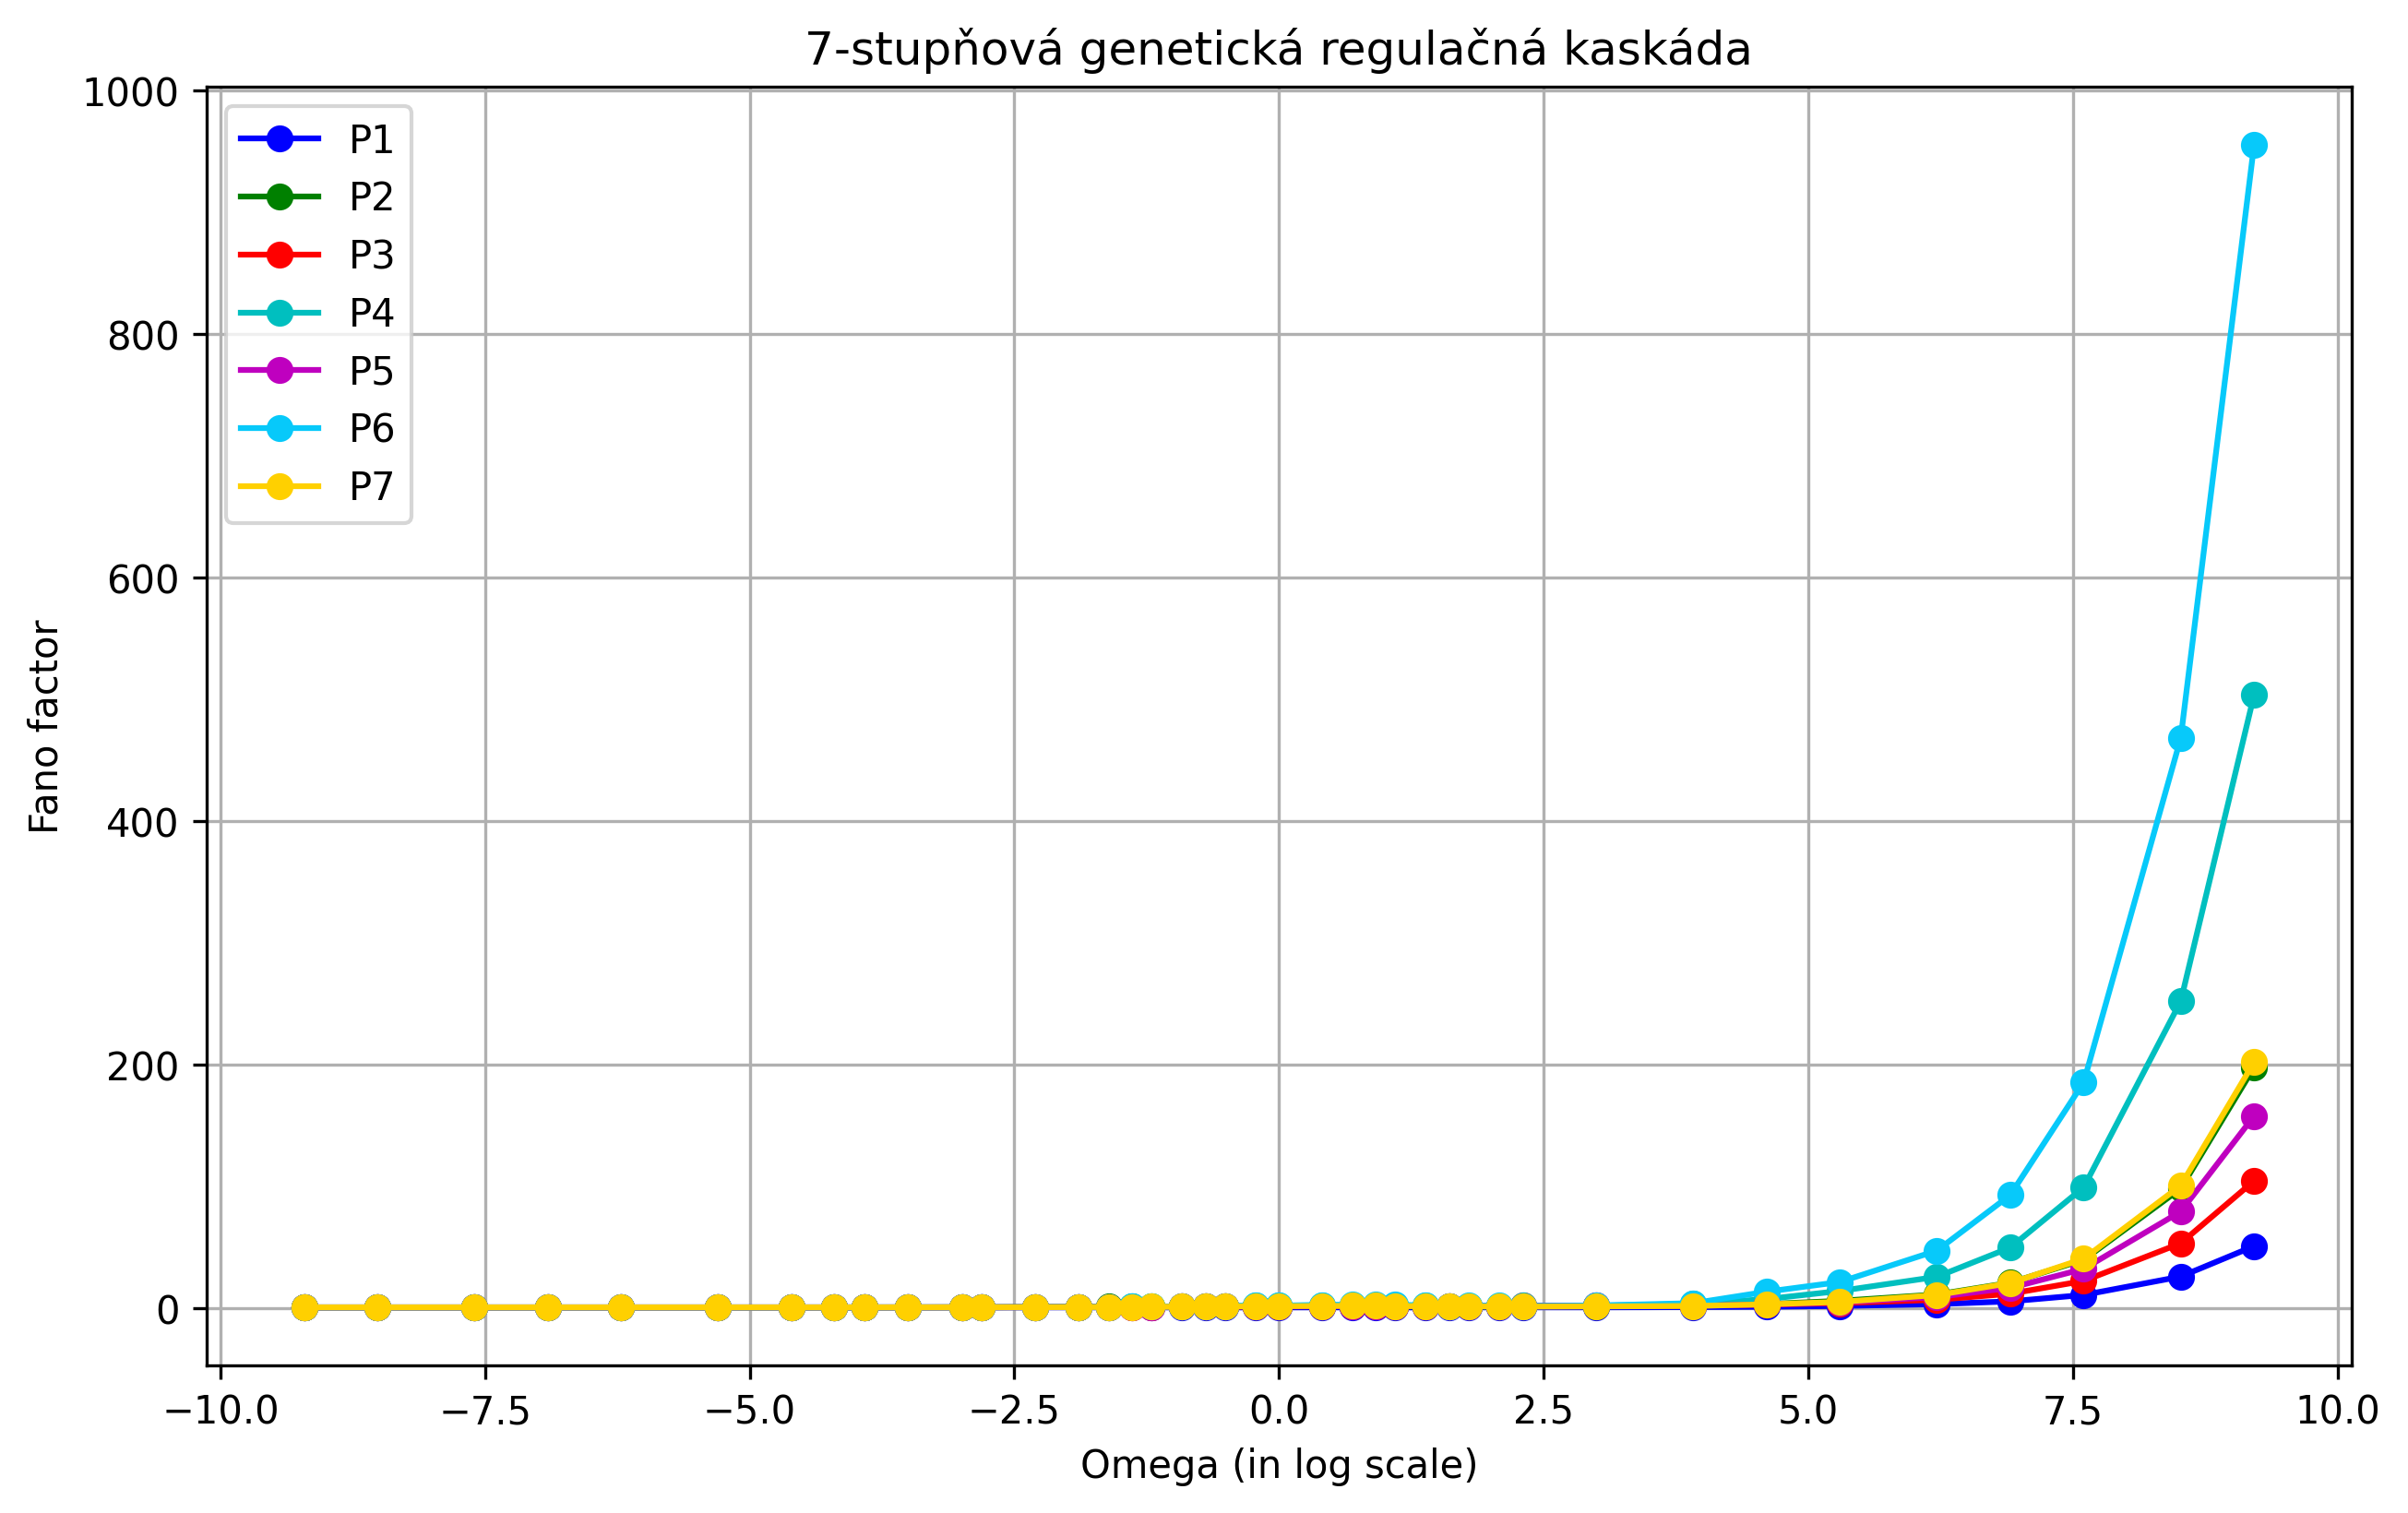

<Figure size 640x480 with 0 Axes>

In [54]:

# Figure parameters
fig1 = plt.figure(figsize=(10, 6), dpi=300)
ax1 = fig1.add_subplot(111)

# Plotting lines
line_p = []
for i in range(7):
    y = [val[i] for idx, val in enumerate(fano_factor)]
    line__p, = ax1.plot(omega_log, y, color=col[i], label=labels[i], marker = 'o')
    line_p.append(line__p)

ax1.set_ylabel('Fano factor')
ax1.set_xlabel('Omega (in log scale)')
ax1.set_title("7-stage gene regulatory cascade")
ax1.legend(handles=line_p, loc="upper left")
ax1.grid(True)

plt.show()